O problema a ser resolvido é analisar as vendas de um Supermercado e identificar padrões, tendências sazonais e comportamentos dos clientes. O objetivo é descobrir insights que ajudem na tomada de decisões do negócio, como previsão de vendas, otimização de estoque e planejamento de promoções.

Este é um problema de aprendizado supervisionado, pois estamos preparando os dados para prever o valor das vendas com base em variáveis de entrada conhecidas.

Algumas hipóteses:

- Sazonalidade nas vendas de determinados produtos ou categorias.
- Clientes diferentes podem ter padrões de compra distintos, influenciados por fatores como datas festivas ou promoções.
- Produtos com maior volume de vendas podem ser mais propensos a quedas de estoque, exigindo planejamento antecipado.

O dataset foi selecionado com base em vendas de produtos alimentícios de um supermercado, abrangendo várias categorias de produtos e clientes. Algumas limitações a serem consideradas incluem possíveis valores faltantes e a necessidade de normalizar dados temporais para facilitar a análise.

In [46]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# A importação demora uns 40 seg, pois o Dataset é um pouco pesado
url = 'https://www.dropbox.com/scl/fi/7uvte9uuh237dodlnde5i/MarketSales.csv?rlkey=7doj1x2jyafdsuvklgxme76o7&st=wd6rpw3k&dl=1'

df_sales = pd.read_csv(url)

C:\Users\Mateus\AppData\Local\Temp\ipykernel_14948\3031342220.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(url)


In [48]:
# Analisando as primeiras linhas
df_sales.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369.0,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464.0,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969.0,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969.0,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336.0,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [49]:
# Analisando as últimas linhas
df_sales.tail()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
611103,511703.0,7.0,EKMEK 250 GR,134656,2017-03-18,1.0,0.9,0.9,0.89,66.0,...,374191.0,Mahmut BAYATGİL,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 09:39:54,2017-03-19 09:40:50,E
611104,511496.0,7.0,EKMEK 250 GR,134630,2017-03-18,1.0,0.9,0.9,0.89,7.0,...,656248.0,Gamze BOTUÇ,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 20:30:58,2017-03-19 20:31:17,K
611105,492612.0,7.0,EKMEK 250 GR,130100,2017-03-15,1.0,0.9,0.9,0.89,59.0,...,78643.0,Cengiz BEREKETÇİ,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-16 17:51:04,2017-03-16 17:51:18,E
611106,512343.0,7.0,EKMEK 250 GR,134762,2017-03-18,1.0,0.9,0.9,0.88,40.0,...,926041.0,Elifnur EGİNKAYA,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 17:00:12,2017-03-19 17:01:20,K
611107,512179.0,3942.0,ETI 80 GR KARAM BITTER,134738,2017-03-18,1.0,1.9,1.9,1.76,74.0,...,241748.0,Hacer CANDEMİR,44,ETİ,GIDA,BÜSKİVİ ÇEREZ,BÜSKİVİ,2017-03-19 16:00:15,2017-03-19 16:00:37,K


In [50]:
# exibindo as estatísticas
df_sales.describe()

,ID,ITEMCODE,FICHENO,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,LATITUDE,LONGITUDE
count,6.111070e+05,603941.000000,611108.000000,611107.000000,611107.000000,611107.000000,611107.000000,611107.000000,611107.000000,6.111070e+05
mean,3.068463e+05,9012.469698,87348.360138,1.270204,3.959574,4.055741,3.735345,39.201544,39.314996,3.029614e+05
std,1.812597e+05,7423.501236,42041.919628,1.995301,6.683096,11.956075,10.817679,21.827203,1.584433,3.597321e+06
min,1.000000e+00,6.000000,15560.000000,0.001000,0.010000,0.010000,0.010000,1.000000,36.401800,2.641420e+01
25%,1.528645e+05,3269.000000,51857.000000,1.000000,1.000000,1.250000,1.110000,22.000000,37.866700,2.897700e+01
50%,3.056480e+05,5719.000000,87169.000000,1.000000,2.300000,2.430000,2.220000,40.000000,39.776700,3.179870e+01
75%,4.584295e+05,14780.000000,122269.000000,1.000000,4.650000,4.960000,4.580000,55.000000,41.005300,3.634980e+01
max,1.445622e+06,23602.000000,586470.000000,502.000000,1799.000000,4278.000000,3625.430000,81.000000,42.023100,4.302160e+07


In [51]:
# Analisando quantidade de linhas, colunas, dados faltantes e o tipo das colunas
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611108 entries, 0 to 611107
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              611107 non-null  float64
 1   ITEMCODE        603941 non-null  float64
 2   ITEMNAME        603941 non-null  object 
 3   FICHENO         611108 non-null  int64  
 4   DATE_           611107 non-null  object 
 5   AMOUNT          611107 non-null  float64
 6   PRICE           611107 non-null  float64
 7   LINENETTOTAL    611107 non-null  float64
 8   LINENET         611107 non-null  float64
 9   BRANCHNR        611107 non-null  float64
 10  BRANCH          611107 non-null  object 
 11  SALESMAN        611108 non-null  object 
 12  CITY            611107 non-null  object 
 13  REGION          611107 non-null  object 
 14  LATITUDE        611107 non-null  float64
 15  LONGITUDE       611107 non-null  float64
 16  CLIENTCODE      592760 non-null  object 
 17  CLIENTNAME

Nessas análises realizadas, percebemos que o Dataset tem 611.108 linhas, mas a maioria das colunas tem 611.107.
Para nossa análise as colunas imprecindíveis são: ITEMCODE, DATE_, LINENETTOTAL, CITY, REGION, CATEGORY_NAME1 e GENDER. Portanto iremos eliminar qualquer valor null dessas colunas.


In [52]:
# Eliminando valores Null da amostragem das principais colunas
df_sales = df_sales.dropna(subset=["DATE_","ITEMCODE", "LINENETTOTAL", "CITY", "REGION", "CATEGORY_NAME1", "GENDER"])

In [53]:
# Convertendo a coluna DATE_ em Datetime para trabalhar com os dados temporais
df_sales['DATE_'] = pd.to_datetime(df_sales['DATE_'])

In [54]:
# Verificando Range de datas
print(df_sales["DATE_"].min())
print(df_sales["DATE_"].max())

2017-01-02 00:00:00
2017-03-31 00:00:00


Temos uma amostragem de 3 meses, começando em Janeiro de 2017 e terminando em Março de 2017

In [55]:
# Somar vendas diárias
daily_sales = df_sales.groupby('DATE_')['LINENETTOTAL'].sum().reset_index()
daily_sales

,DATE_,LINENETTOTAL
0,2017-01-02,2819.00
1,2017-01-03,3901.94
2,2017-01-04,2731.57
3,2017-01-05,18085.35
4,2017-01-06,19890.32
...,...,...
84,2017-03-27,27348.19
85,2017-03-28,34647.27
86,2017-03-29,22492.50
87,2017-03-30,25825.59


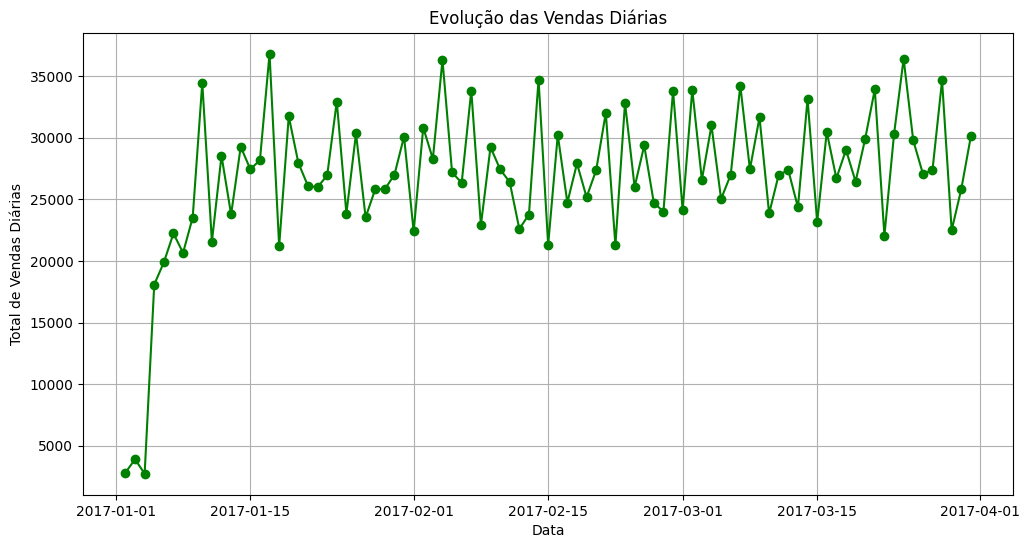

In [56]:
# Análise Temporal - Vendas ao Longo do Tempo
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['DATE_'], daily_sales['LINENETTOTAL'], color='green', marker='o')
plt.title('Evolução das Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total de Vendas Diárias')
plt.grid(True)
plt.show()

Percebemos que a venda dos primeiros 3 dias foi bem baixa, e temos varios picos durante a semana.

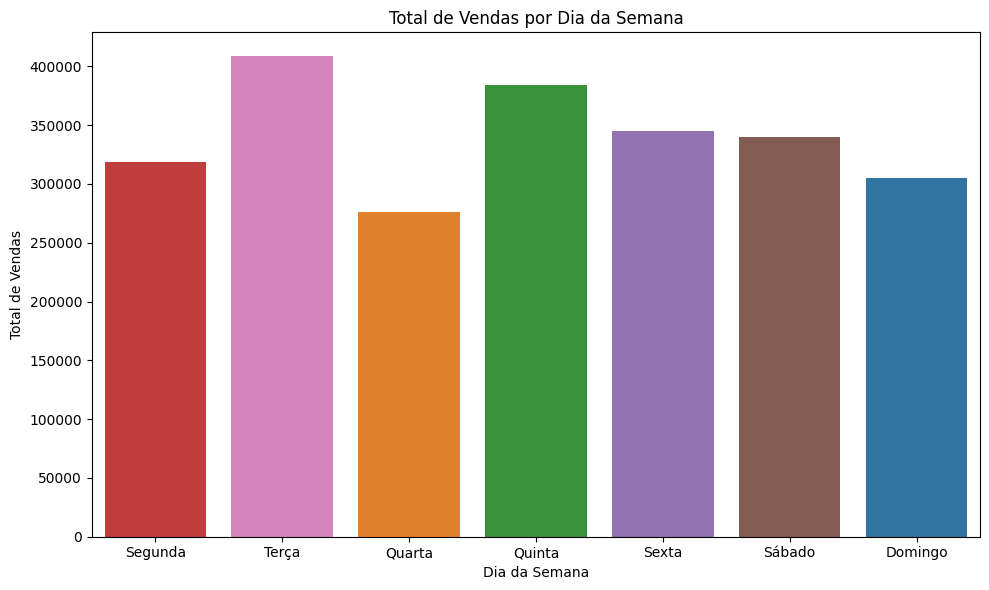

In [57]:
# Criei uma coluna para o dia da semana (0 = Segunda, 6 = Domingo)
df_sales['dia_semana'] = df_sales['DATE_'].dt.dayofweek

# Criei um dicionário para converter a numeração dos dias nos nomes
dias_semana = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
df_sales['dia_semana'] = df_sales['dia_semana'].map(dias_semana)

# Agrupando as vendas por dia da semana
df_dia_semana = df_sales.groupby('dia_semana')['LINENETTOTAL'].sum().reset_index()

# Ordenar os dias da semana na ordem correta
ordem_dia = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='LINENETTOTAL', hue="dia_semana", data=df_dia_semana, order=ordem_dia)
plt.title('Total de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Vendas')
plt.tight_layout()
plt.show()

- Queda acentuada de venda as Quartas e Segundas
- Picos de vendas as Terças e Quintas

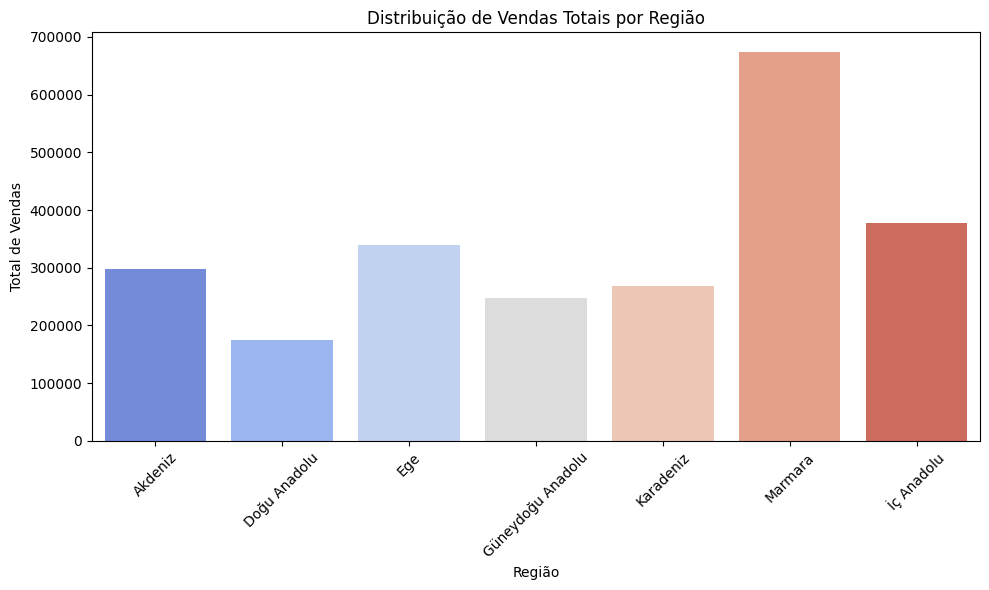

In [58]:
# Vendas por Região

# Agrupando as categorias pelo Total
df_regiao = df_sales.groupby('REGION')['LINENETTOTAL'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='REGION', y='LINENETTOTAL', hue='REGION', data=df_regiao, palette="coolwarm")
plt.title('Distribuição de Vendas Totais por Região')
plt.xlabel('Região')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A região com maior venda é em Marmara, levando bastante vantagem sobre as demais

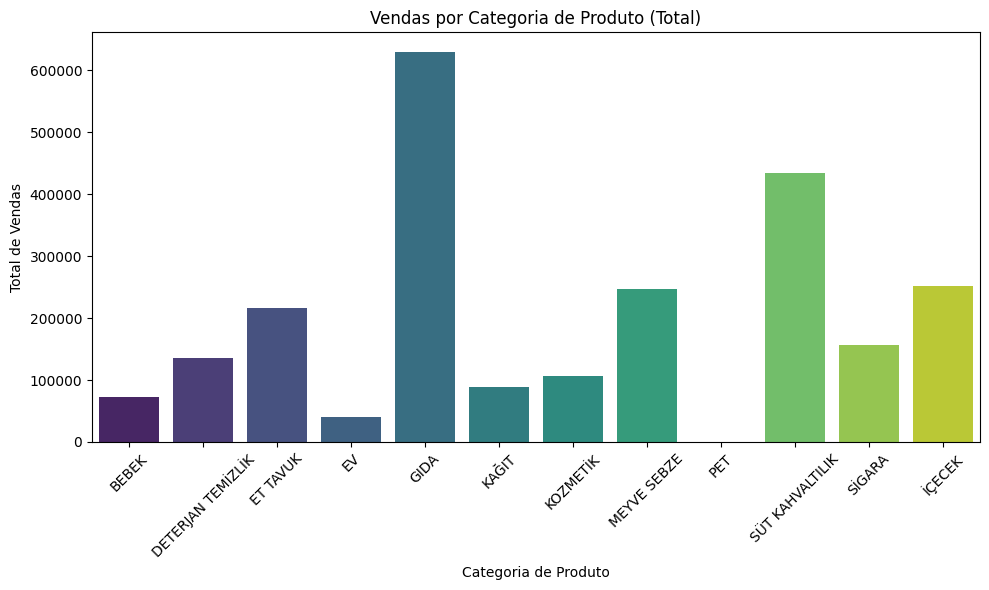

In [59]:
# Agrupando as categorias pelo Total
df_category = df_sales.groupby('CATEGORY_NAME1')['LINENETTOTAL'].sum().reset_index()

# Criando o gráfico de categorias
plt.figure(figsize=(10, 6))
sns.barplot(x='CATEGORY_NAME1', y='LINENETTOTAL', data=df_category, palette="viridis", hue='CATEGORY_NAME1', legend=False)
plt.title('Vendas por Categoria de Produto (Total)')
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2 Categorias predominam: GIDA e SÜT KAHVALTILK

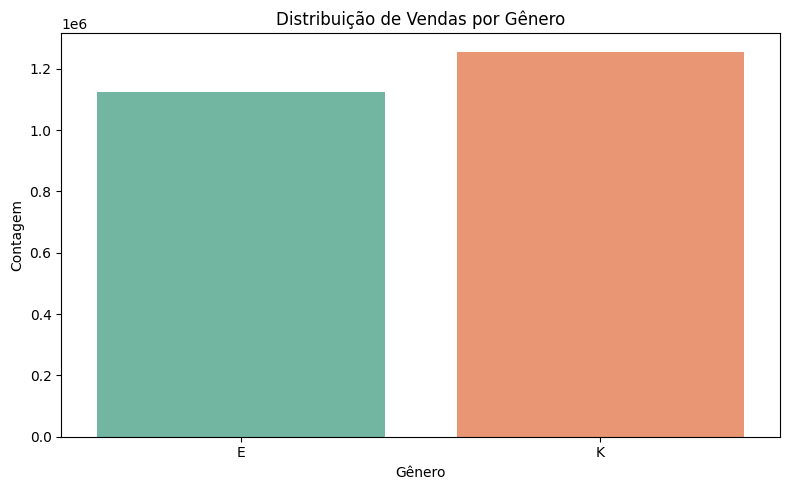

In [60]:
# Distribuição de Gênero nas Vendas
df_genero = df_sales.groupby('GENDER')['LINENETTOTAL'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='GENDER', y='LINENETTOTAL', hue='GENDER', data=df_genero, palette="Set2")
plt.title('Distribuição de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

Como o Dataset é de um Supermercado Turco, os Gêneros seguem a sigla onde "E" é o Masculino e o "K" é o Feminino. Percebemos que não tem um diferença tão grande, mas a maioria são mulheres.